## Matplotlib

[`matplotlib`](http://matplotlib.org/) is probably the single most-used Python package for graphics. It provides both a very quick way to visualize data from Python and publication-quality figures in many formats. It is also highly customizable, allowing you to create [rich visualizations](http://droettboom.com/jhepc2018-judge-packet/) of complex data.

The `matplotlib.pyplot` module is a collection of command style functions that make `matplotlib` work like MATLAB. Each `pyplot` function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. 

Let's start with a very simple plot. First we set the `%matplotlib inline` option, which tells the Jupyter notebook to embed all plots as static images. Next, we import the `matplotlib.pyplot` module using the shorter alias `plt`, so that we don't have to use the full module name every time we call a `pyplot` function. Then we call the `.plot()` command on a list of integers to create a plot. Finally, we use the `.show()` command to render the plot and embed it underneath the code block.

# Data science in Python

## Session 2.2: Data visualisation with Matplotlib

- [Matplotlib](#Matplotlib)
- [Exercise 2.2.1](#Exercise-2.2.1)

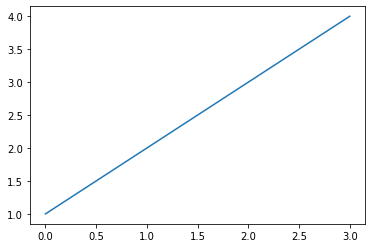

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.show()

After we create a plot, we can use the `.xlabel()` and `.ylabel()` commands to decorate it with axis legends, and add a title using the `.title()` command

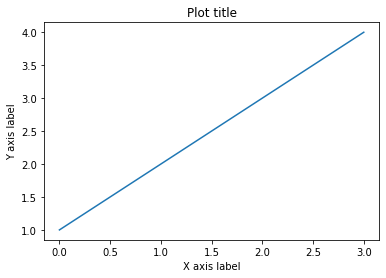

In [2]:
plt.plot([1,2,3,4])
plt.xlabel("X axis label")
plt.ylabel("Y axis label")
plt.title("Plot title")
plt.show()

`.plot()` is a versatile command. To plot x versus y, we can input two lists of integers:

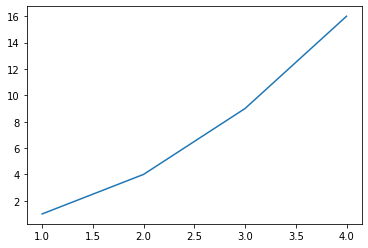

In [3]:
plt.plot([1,2,3,4], [1,4,9,16])

For every x, y pair of arguments, there is an **optional third argument** which is the format string that indicates the color and line type of the plot. The letters and symbols of the format string are from MATLAB, and you concatenate a color string with a line style string. The default format string is `'b-'`, which is a solid blue line. For example, to plot the above with red circles, you would chose `'ro'`.

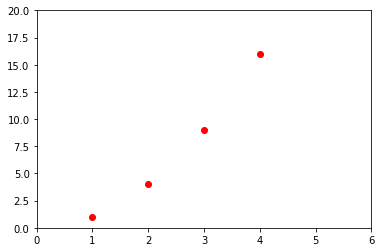

In [7]:
#this is called a magic line, and is added so the graph comes out but not as an output
%matplotlib inline 

import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [1,4,9,16], 'ro') #'ro' refers to colour red and plot point as a o
plt.axis([0, 6, 0, 20])
plt.show()

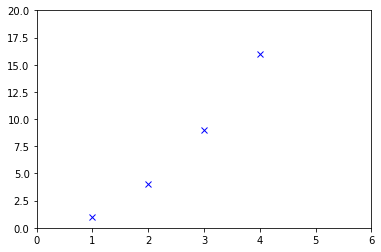

In [10]:
%matplotlib inline 

import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [1,4,9,16], 'bx') #'bx' refers to colour blue and plot point as a x
plt.axis([0, 6, 0, 20])
plt.show()

These formatting options can be especially useful when displaying data from different sources on the same plot. Once the plot is created, additional lines with different options can be added by calling the `.plot()` command multiple times before calling `.show()`. 

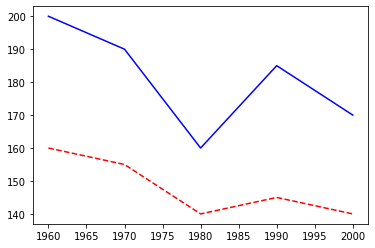

In [12]:
#plotting two lines in the same graph
%matplotlib inline

import matplotlib.pyplot as plt
year = [1960, 1970, 1980, 1990, 2000]
rainfall_Manchester = [200, 190, 160, 185, 170]
rainfall_London = [160, 155, 140, 145, 140]
plt.plot(year, rainfall_Manchester, 'b-') # - here refers to a continous line
plt.plot(year, rainfall_London, 'r--') # -- refers to a dashed line
plt.show()

With more than one dataset on the same plot, we often need to add a legend to the plot. This can be done by passing the `label` argument to each `.plot()` command, and then calling the `.legend()` command on the plot.

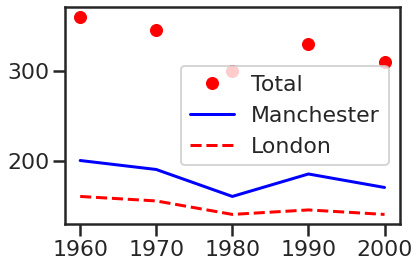

In [41]:
%matplotlib inline

import matplotlib.pyplot as plt
year = [1960, 1970, 1980, 1990, 2000]
rainfall_Manchester = [200, 190, 160, 185, 170]
rainfall_London = [160, 155, 140, 145, 140]
sum_list=[a+b for a,b in zip(rainfall_Manchester,rainfall_London)] #nice way to add the cumulative amount of both parts of the plot
plt.plot(year,sum_list,'ro',label='Total')
plt.plot(year, rainfall_Manchester, 'b-', label = 'Manchester')
plt.plot(year, rainfall_London, 'r--', label = 'London')
plt.legend()
plt.show()

Once we have made a plot, we can write it to disk by using the `.savefig()` command instead of the `.show()` command. This will infer the file format from the ending of the file name e.g. "myplot.svg" will write in SVG format, "myplot.pdf" will write in PDF format etc. **Note: the range of file types that can be written may vary between different operating systems.**

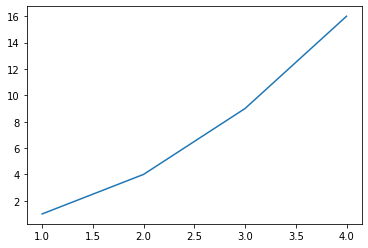

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [1,4,9,16])
plt.savefig("myplot.svg")

## Functions for specific plot types
`matplotlib.pyplot` has a few functions that make creating common types of plots faster and more convenient because they automatically create a Figure and an Axes object (more on this in the next section). The most widely used are:

- [`plt.bar()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar) – creates a bar chart.
- [`plt.boxplot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot) – makes a box and whisker plot.
- [`plt.hist()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist) – makes a histogram.
- [`plt.plot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) – creates a line plot.
- [`plt.scatter()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) – makes a scatter plot.

Each of these methods has different parameters that can be passed in to modify the resulting plot. For example, let's plot a bar chart of the population size of different European capital cities:

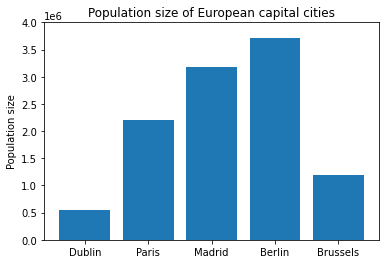

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
city = ["Dublin", "Paris", "Madrid", "Berlin", "Brussels"]
population = [553165, 2206488, 3182981, 3711930, 1191604]
plt.bar(range(len(city)), population)
plt.xticks(range(len(city)), city)
plt.ylabel("Population size")
plt.title("Population size of European capital cities")
plt.ylim(0,4000000)
plt.show()

A full list of functions and details of how to use them is available from the `pyplot` [API documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html).

## Storing the Figure and Axes objects

So far, we have been using `matplotlib`'s **state-based interface** , calling `pyplot` functions such as `.plot()`, `.title()`, and `.xlabel()` directly, and using them to add elements to a single, currently-active plot. 

It is also common to use `matplotlib`'s **object-oriented interface**. To do this, we first create a Figure object, and store it using the variable name `fig`. Next, we use the `.gca()` method to retrieve the Axes object associated with the Figure, which we store using the variable name `ax`. Finally, we decorate the Axes object, adding a title, labels, etc.

This is often a point of confusion when first using `matplotlib`, because the methods used to decorate the plot change slightly in the object-oriented case. When using this approach, we now have to call the object methods `.set_title()`, `.set_xlabel()`, `.set_ylabel()`, etc.

For example, let's plot the GC content along a gene using the quick state-based approach:

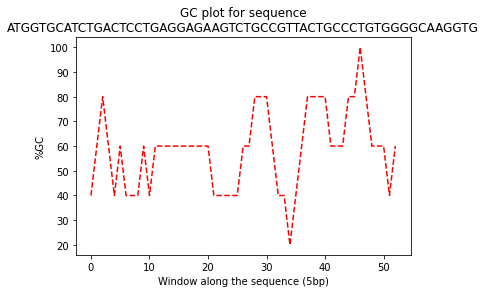

In [19]:
%matplotlib inline
seq = 'ATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTG'
gc = [40.0, 60.0, 80.0, 60.0, 40.0, 60.0, 40.0, 40.0, 40.0, 60.0, 
      40.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 
      60.0, 40.0, 40.0, 40.0, 40.0, 40.0, 60.0, 60.0, 80.0, 80.0, 
      80.0, 60.0, 40.0, 40.0, 20.0, 40.0, 60.0, 80.0, 80.0, 80.0, 
      80.0, 60.0, 60.0, 60.0, 80.0, 80.0, 100.0, 80.0, 60.0, 60.0, 
      60.0, 40.0, 60.0]

import matplotlib.pyplot as plt
plt.plot(gc, 'r--') #default colour is blue
plt.xlabel('Window along the sequence (5bp)')
plt.ylabel('%GC')
plt.title('GC plot for sequence\n' + seq) # '\n' allows you to make a break in the title
plt.show()

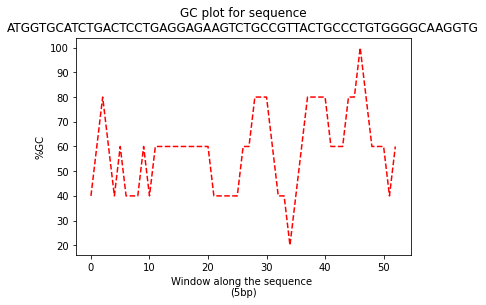

In [21]:
%matplotlib inline
seq = 'ATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTG'
gc = [40.0, 60.0, 80.0, 60.0, 40.0, 60.0, 40.0, 40.0, 40.0, 60.0, 
      40.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 
      60.0, 40.0, 40.0, 40.0, 40.0, 40.0, 60.0, 60.0, 80.0, 80.0, 
      80.0, 60.0, 40.0, 40.0, 20.0, 40.0, 60.0, 80.0, 80.0, 80.0, 
      80.0, 60.0, 60.0, 60.0, 80.0, 80.0, 100.0, 80.0, 60.0, 60.0, 
      60.0, 40.0, 60.0]

import matplotlib.pyplot as plt
plt.plot(gc, 'r--') #default colour is blue
plt.xlabel('Window along the sequence \n(5bp)') # '\n' allows you to make a break in the axis too
plt.ylabel('%GC')
plt.title('GC plot for sequence\n' + seq) 
plt.show()

Now let's generate the same plot using the object-oriented approach:

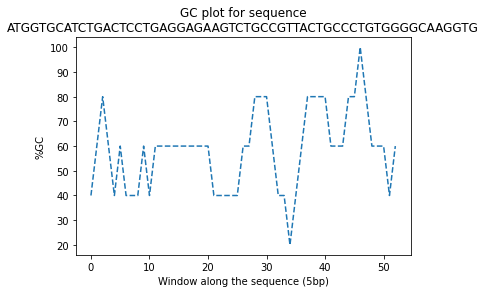

In [20]:
%matplotlib inline
seq = 'ATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTG'
gc = [40.0, 60.0, 80.0, 60.0, 40.0, 60.0, 40.0, 40.0, 40.0, 60.0, 
      40.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 
      60.0, 40.0, 40.0, 40.0, 40.0, 40.0, 60.0, 60.0, 80.0, 80.0, 
      80.0, 60.0, 40.0, 40.0, 20.0, 40.0, 60.0, 80.0, 80.0, 80.0, 
      80.0, 60.0, 60.0, 60.0, 80.0, 80.0, 100.0, 80.0, 60.0, 60.0, 
      60.0, 40.0, 60.0]

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca()
ax.plot(gc, '--')
ax.set_xlabel('Window along the sequence (5bp)')
ax.set_ylabel('%GC')
ax.set_title('GC plot for sequence\n' + seq)
plt.show()

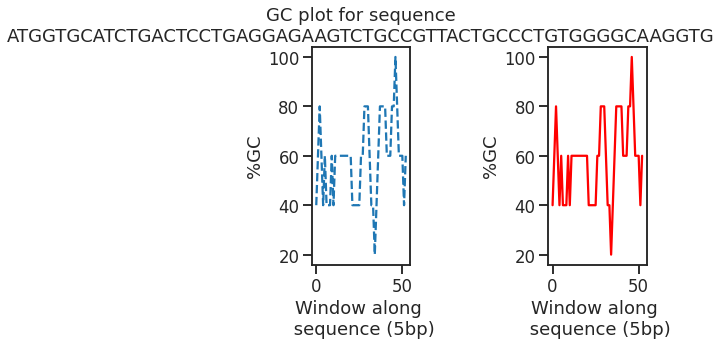

In [32]:
#just an example to see how it works to have two graphs in the same plot
%matplotlib inline
seq = 'ATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTG'
gc = [40.0, 60.0, 80.0, 60.0, 40.0, 60.0, 40.0, 40.0, 40.0, 60.0, 
      40.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 
      60.0, 40.0, 40.0, 40.0, 40.0, 40.0, 60.0, 60.0, 80.0, 80.0, 
      80.0, 60.0, 40.0, 40.0, 20.0, 40.0, 60.0, 80.0, 80.0, 80.0, 
      80.0, 60.0, 60.0, 60.0, 80.0, 80.0, 100.0, 80.0, 60.0, 60.0, 
      60.0, 40.0, 60.0]

import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax1.plot(gc, '--')
ax1.set_xlabel('Window along \n sequence (5bp)')
ax1.set_ylabel('%GC')
ax1.set_title('GC plot for sequence\n' + seq)

ax2 = fig.add_subplot(1,3,3)
ax2.plot(gc, 'r-')
ax2.set_xlabel('Window along \n sequence (5bp)')
ax2.set_ylabel('%GC')
#ax2.set_title('GC plot for sequence\n' + seq)



plt.show()

Using the object-oriented approach, you can create one Figure object with multiple Axes for different sub-panels. Giving each Axes a distinct variable name allows you to plot different information in each panel. 

## Plotting directly from `Pandas` objects

As seen in the previous session, it is possible to plot directly from `pandas`. We first create a `pandas` DataFrame object from the GC data above:

In [22]:
import pandas
gc_df = pandas.DataFrame(gc, columns=['gc'])
gc_df.head()

,gc
0,40.0
1,60.0
2,80.0
3,60.0
4,40.0


Next, we call the `.plot()` method on the `pandas` DataFrame, which is a wrapper around `matplotlib.pyplot.plot()`. We store the object using the variable name `thisplot`:

Text(0.5, 1.0, 'GC plot for sequence\nATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTG')

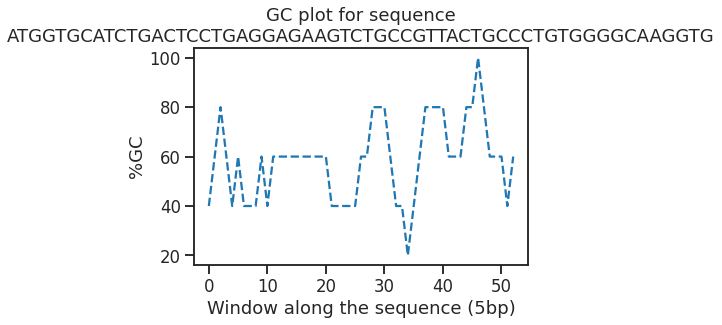

In [34]:
%matplotlib inline

#you can plot just the column in the "name for making the graph"
thisplot = gc_df.gc.plot(style='--') #if you dont add a style, it will use a default style
thisplot.set_xlabel('Window along the sequence (5bp)')
thisplot.set_ylabel('%GC')
thisplot.set_title('GC plot for sequence\n' + seq)

Note that the `pandas` plots use the object-oriented interface, so we have to call `.set_xlabel()` on our stored figure object rather than `.xlabel()` to decorate the plot. 

## Modifying figure aesthetics with `Seaborn`

[`seaborn`](https://seaborn.pydata.org) is a data visualization library based on `matplotlib`. It provides easy ways to customize the aesthetics of basic `matplotlib` figures, as well as a range of additional plot types (see [examples](https://seaborn.pydata.org/examples/index.html)). We import `seaborn` and give it the alias `sns`.

Let's now modify the style of our previous `matplotlib` code. 

Using the `.set_style()` method with the option `'darkgrid'` we can create a similar aesthetic to `R`'s `ggplot2` package. Other [available styles](https://seaborn.pydata.org/tutorial/aesthetics.html) include `'whitegrid'`, `'dark'`, `'white'`, and `'ticks'`.

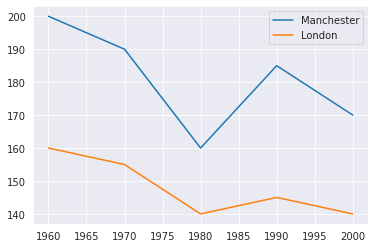

In [24]:
%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')

year = [1960, 1970, 1980, 1990, 2000]
rainfall_Manchester = [200, 190, 160, 185, 170]
rainfall_London = [160, 155, 140, 145, 140]
plt.plot(year, rainfall_Manchester, label = 'Manchester')
plt.plot(year, rainfall_London, label = 'London')
plt.legend()
plt.show()

To modify a plot so that it will be clearly visible on a slide or poster, we can use the `.set_context()` method. For example, here is the same plot with the `'ticks'` style, formatted using the `'talk'` context. Note how both the font size and thickness of the lines has increased with a single command.

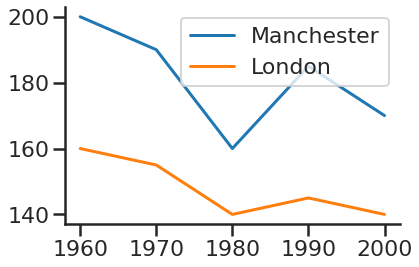

In [39]:
%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('ticks')
sns.set_context('poster') #options are talk, poster, notebook, paper

year = [1960, 1970, 1980, 1990, 2000]
rainfall_Manchester = [200, 190, 160, 185, 170]
rainfall_London = [160, 155, 140, 145, 140]
plt.plot(year, rainfall_Manchester, label = 'Manchester')
plt.plot(year, rainfall_London, label = 'London')
plt.legend()

# removes the border on the right and top of the plot
sns.despine()

plt.show()

## Exercise 2.2.1

Re-use the GapMinder dataset to plot, in Jupyter using Matplotlib, a scatter plot of world life expectancy against GDP per capita for 1952, 1977 and 2007. Add a title, axis labels and legend to your figure.

Find the country with the highest GDP per capita for 1952, 1977 and 2007.

Re-write the function `gdp_stats_by_continent_and_year()` using Pandas.

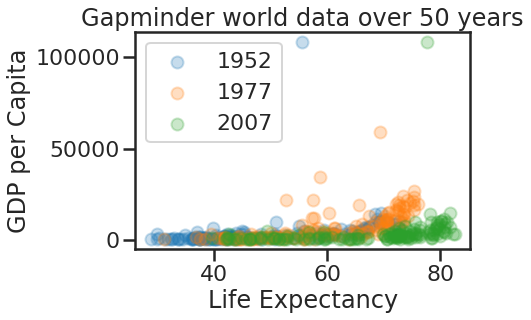

    country continent  year  lifeExp     pop    gdpPercap
840  Kuwait      Asia  1952   55.565  160000  108382.3529
    country continent  year  lifeExp      pop    gdpPercap
845  Kuwait      Asia  1977   69.343  1140357  59265.47714
     country continent  year  lifeExp      pop    gdpPercap
1139  Norway    Europe  2007   80.196  4627926  49357.19017


In [70]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

data = pandas.read_csv('data/gapminder.csv')

year1952=data[data.year == 1952] #its already a data type, not a string when using pandas
year1977=data[data.year == 1977]
year2007=data[data.year == 2007]

plt.scatter(year1952.lifeExp,year1952.gdpPercap,label='1952',alpha=0.25)

plt.scatter(year1977.lifeExp,year1977.gdpPercap,label='1977',alpha=0.25)

plt.scatter(year2007.lifeExp,year1952.gdpPercap,label='2007',alpha=0.25)
plt.title('Gapminder world data over 50 years')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP per Capita')
plt.legend()
plt.show()

#find highest GDP

print(year1952[year1952.gdpPercap==year1952.gdpPercap.max()])
print(year1977[year1977.gdpPercap==year1977.gdpPercap.max()])
print(year2007[year2007.gdpPercap==year2007.gdpPercap.max()])


In [73]:
import os
import pandas

def gdp_stats_by_continent_and_year(continent='Europe', year=1952, gapminder_filepath=os.path.join('data', 'gapminder.csv')):
    gapminder_data = pandas.read_csv(gapminder_filepath)
    filtered_data = gapminder_data[(gapminder_data['year'] == year) & (gapminder_data['continent'] == continent)] # == the input arguments given to the function
    print(continent, 'GDP per Capita in', year)
    return {'mean': filtered_data['gdpPercap'].mean(), 'median': filtered_data['gdpPercap'].median(), 'stdev': filtered_data['gdpPercap'].std()}

In [74]:
print(gdp_stats_by_continent_and_year())

Europe GDP per Capita in 1952
{'mean': 5661.0574347599995, 'median': 5142.469716, 'stdev': 3114.0604926553233}


In [75]:
print(gdp_stats_by_continent_and_year('Americas'))

Americas GDP per Capita in 1952
{'mean': 4079.0625522000005, 'median': 3048.3029, 'stdev': 3001.7275216326566}


## Next session

Go to our next notebook: [Session 2.3: Biological data with BioPython](23_python_data.ipynb)